In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


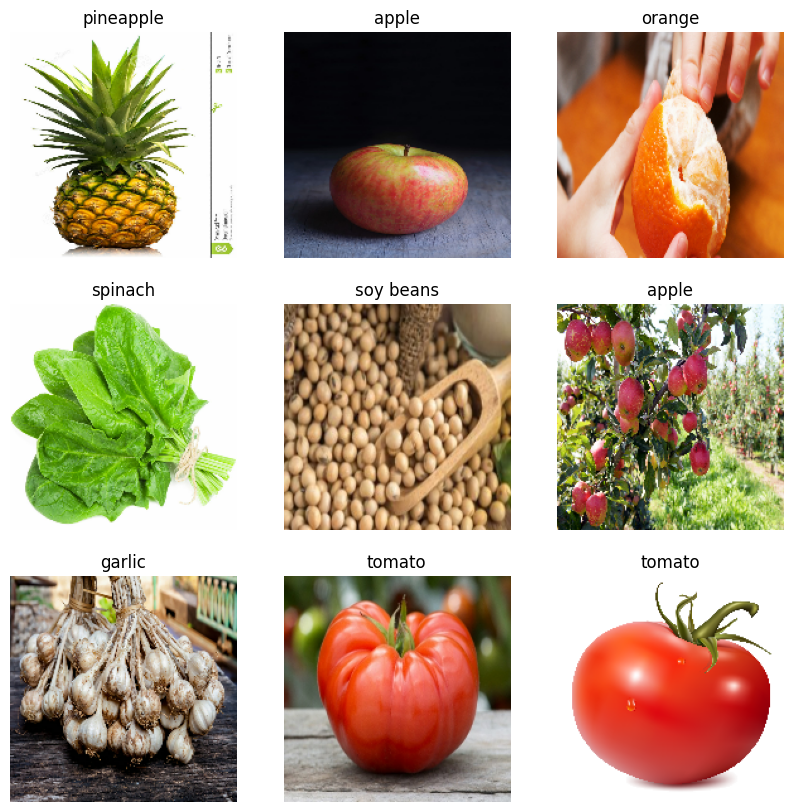

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 498ms/step - accuracy: 0.0707 - loss: 3.6048 - val_accuracy: 0.3647 - val_loss: 2.2689
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 515ms/step - accuracy: 0.3022 - loss: 2.4851 - val_accuracy: 0.6268 - val_loss: 1.4312
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 389ms/step - accuracy: 0.4529 - loss: 1.9347 - val_accuracy: 0.7521 - val_loss: 0.9311
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 411ms/step - accuracy: 0.5902 - loss: 1.4218 - val_accuracy: 0.8177 - val_loss: 0.6383
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 407ms/step - accuracy: 0.7212 - loss: 0.9846 - val_accuracy: 0.9145 - val_loss: 0.3681
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 411ms/step - accuracy: 0.8258 - loss: 0.5912 - val_accuracy: 0.9316 - val_loss: 0.3473
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 414ms/step - accuracy: 0.9011 - loss: 0.3399 - val_accuracy: 0.9459 - val_loss: 0.3348
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 416ms/step - accuracy: 0.9192 - loss: 0.3173 - val_accu

In [17]:
image = 'download.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [18]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


In [22]:
score = tf.nn.softmax(predict)

In [27]:
print("Image = ", data_cat[np.argmax(score)])

Image =  corn


In [24]:
model.save('Image_classify.keras')